# Regression model with Scikit-Learn

## Get data

In [8]:
# Get input data

import os
import tarfile
from six.moves import urllib

source = 'http://raw.githubusercontent.com/ageron/handson-ml/master/'
path = 'datasets/housing'
archive_file_name = 'housing.tgz'
raw_file_name = 'housing.csv'
url = source + path + '/' + file_name

def fetch_data(url=url, path=path):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, file_name)
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()
    
fetch_data()

In [13]:
# load data

import pandas as pd

def load_data(path=path):
    csv_path = os.path.join(path, raw_file_name)
    return pd.read_csv(csv_path)

data = load_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Examine data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualise histograms for features and label

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f447c4530f0>,
      dtype=object)

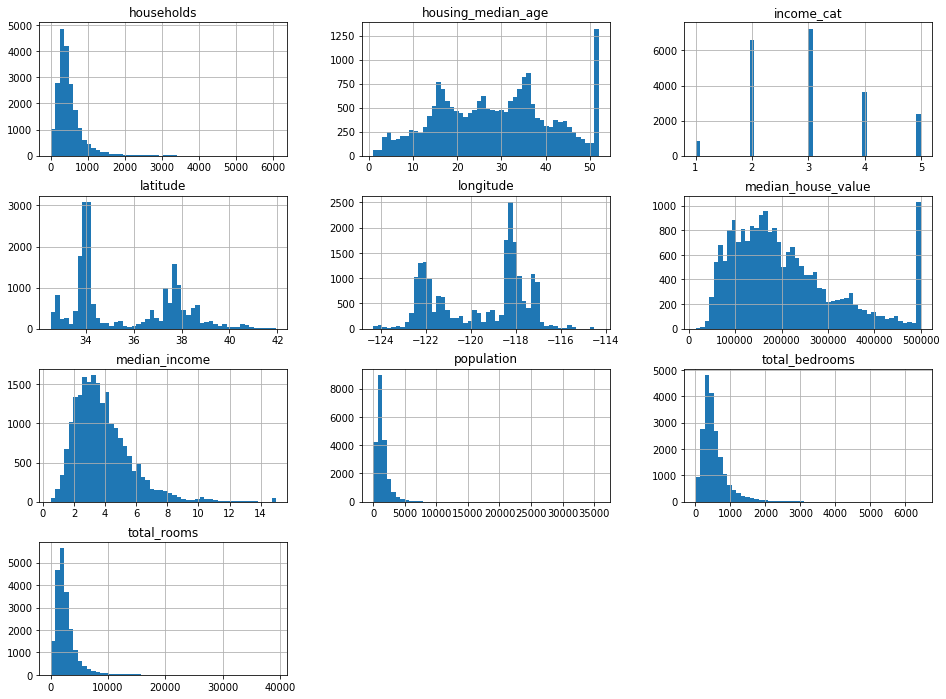

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(16,12))

# Transform features when applicable

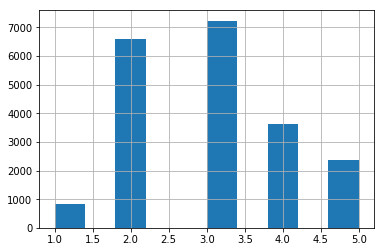

In [45]:
# transform categorical data into a numerical format

import numpy as np
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)
data['income_cat'].hist()

## Split data into Training and Test Sets using a Stratified Shuffle Split

In [46]:
# Respect the distribution of data points per income category when sampling data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['income_cat']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]  
    
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [47]:
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Visualizing Geographical Data

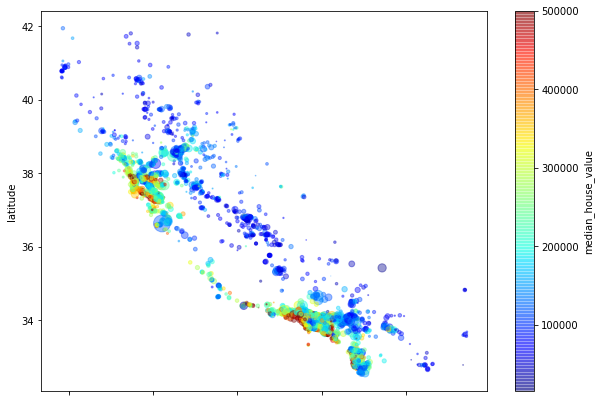

In [52]:
test_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              s=test_set['population']/100, figsize=(10,7),
              c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

## Looking for Correlations

In [56]:
# Look for feature that have significant or strong positive or negative correlation with the target/label
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4476afec18>,
      dtype=object)

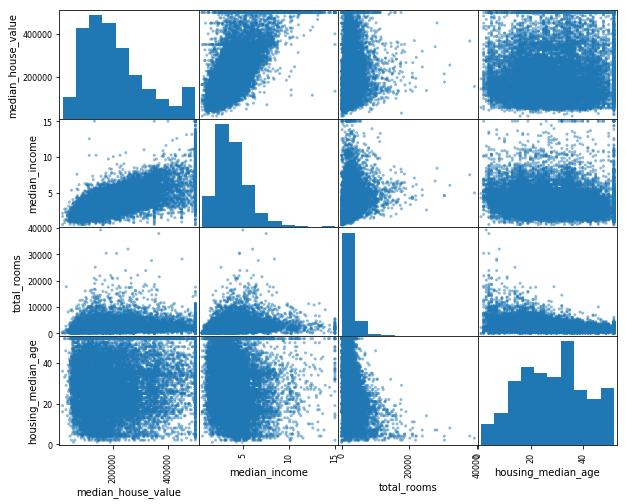

In [59]:
# Plot Scatter Matrix for promising features

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set[attributes], figsize=(10,8))

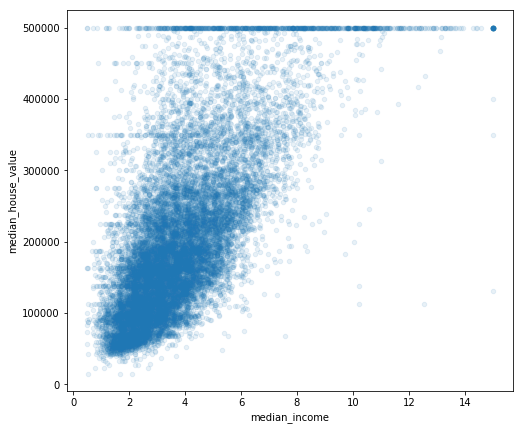

In [61]:
# Plot a scatter matrix for the most promising feature

train_set.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(8,7))

## Add meaningful features to the data set

In [62]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [64]:
# Look for feature that have significant or strong positive or negative correlation with the target/label
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare the Data for ML Algorithms

In [66]:
housing =train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

## Data Cleaning

In [72]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms', axis=1)
median_tb = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_tb, inplace=True)